# Neural Network from Scratch

## Prologue

This is a neural network implementation from scratch (in Python) I made by following the guide at: http://www.code-spot.co.za/2009/10/08/15-steps-to-implemented-a-neural-net/. Besides "regular" Python, I only used NumPy, matplotlib and pandas.

## Imports (Step 1)

In [1]:
import numpy as np # matrix operation library
import matplotlib.pyplot as plt # plotting library

## Output and class conversion functions (Step 2)

In [2]:
def output_to_class(output):
    return (np.argmax(output) + 1)

In [3]:
def outputs_to_classes(outputs):
    classes = []
    for output in outputs:
        classes.append(output_to_class(output))
    return np.array(classes)

In [4]:
def class_to_output(class_prediction):
    if (class_prediction == 1):
        return (1, 0, 0)
    elif (class_prediction == 2):
        return (0, 1, 0)
    elif (class_prediction == 3):
        return (0, 0, 1)
    raise ValueError("Class prediction not 1, 2 or 3")

In [5]:
def classes_to_outputs(class_predictions):
    outputs = []
    for class_prediction in class_predictions:
        outputs.append(class_to_output(class_prediction))
    return np.array(outputs)

Let's test the above functions:

In [6]:
output_to_class((1, 0, 0))

1

In [7]:
output_to_class((0, 1, 0))

2

In [8]:
output_to_class((0, 0, 1))

3

In [9]:
outputs_to_classes([(1, 0, 0), (0, 1, 0), (0, 0, 1)])

array([1, 2, 3])

In [10]:
class_to_output(1)

(1, 0, 0)

In [11]:
class_to_output(2)

(0, 1, 0)

In [12]:
class_to_output(3)

(0, 0, 1)

In [13]:
classes_to_outputs([1, 2, 3])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

## File reading functions (Step 3)

Let's read in the data files provided by the author:

In [14]:
IRIS_DATA_FILES_PATH = "data/iris_data_files"

Here I will use __pandas__:

In [15]:
import pandas as pd

In [16]:
iris_train = pd.read_csv(IRIS_DATA_FILES_PATH + "/iris_training.dat", header=None, sep="\t", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "iris-setosa", "iris-versicolor", "iris-virginica"])

In [17]:
iris_train

,sepal_length,sepal_width,petal_length,petal_width,iris-setosa,iris-versicolor,iris-virginica
0,0.282131,0.269205,0.430645,0.427485,0,1,0
1,0.582374,0.445654,0.581855,0.536988,0,1,0
2,0.466896,0.480944,0.566734,0.500487,0,1,0
3,0.744044,0.516233,0.672581,0.609990,0,1,0
4,0.212844,0.516233,0.158468,0.135476,1,0,0
...,...,...,...,...,...,...,...
70,0.259036,0.622103,0.173589,0.135476,1,0,0
71,0.143558,0.480944,0.097984,0.098975,1,0,0
72,0.905713,0.480944,0.929637,0.828996,0,0,1
73,0.582374,0.410364,0.657460,0.719493,0,0,1


In [18]:
iris_train_features = iris_train[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [19]:
iris_train_features

,sepal_length,sepal_width,petal_length,petal_width
0,0.282131,0.269205,0.430645,0.427485
1,0.582374,0.445654,0.581855,0.536988
2,0.466896,0.480944,0.566734,0.500487
3,0.744044,0.516233,0.672581,0.609990
4,0.212844,0.516233,0.158468,0.135476
...,...,...,...,...
70,0.259036,0.622103,0.173589,0.135476
71,0.143558,0.480944,0.097984,0.098975
72,0.905713,0.480944,0.929637,0.828996
73,0.582374,0.410364,0.657460,0.719493


In [20]:
iris_train_targets = iris_train[["iris-setosa", "iris-versicolor", "iris-virginica"]]

In [21]:
iris_train_targets

,iris-setosa,iris-versicolor,iris-virginica
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
70,1,0,0
71,1,0,0
72,0,0,1
73,0,0,1


In [22]:
iris_val = pd.read_csv(IRIS_DATA_FILES_PATH + "/iris_validation.dat", header=None, sep="\t", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "iris-setosa", "iris-versicolor", "iris-virginica"])

In [23]:
iris_val

,sepal_length,sepal_width,petal_length,petal_width,iris-setosa,iris-versicolor,iris-virginica
0,0.813331,0.692682,0.854032,0.975000,0,0,1
1,0.282131,0.480944,0.143347,0.135476,1,0,0
2,0.212844,0.551523,0.143347,0.135476,1,0,0
3,0.605470,0.586813,0.838911,0.975000,0,0,1
4,0.466896,0.339785,0.460887,0.427485,0,1,0
5,0.420705,0.339785,0.596976,0.500487,0,1,0
6,0.420705,0.657392,0.128226,0.135476,1,0,0
7,0.513088,0.480944,0.702823,0.719493,0,0,1
8,0.305227,0.128046,0.460887,0.427485,0,1,0
9,0.489992,0.375074,0.551613,0.427485,0,1,0


In [24]:
iris_val_features = iris_val[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [25]:
iris_val_features

,sepal_length,sepal_width,petal_length,petal_width
0,0.813331,0.692682,0.854032,0.975000
1,0.282131,0.480944,0.143347,0.135476
2,0.212844,0.551523,0.143347,0.135476
3,0.605470,0.586813,0.838911,0.975000
4,0.466896,0.339785,0.460887,0.427485
5,0.420705,0.339785,0.596976,0.500487
6,0.420705,0.657392,0.128226,0.135476
7,0.513088,0.480944,0.702823,0.719493
8,0.305227,0.128046,0.460887,0.427485
9,0.489992,0.375074,0.551613,0.427485


In [26]:
iris_val_targets = iris_val[["iris-setosa", "iris-versicolor", "iris-virginica"]]

In [27]:
iris_val_targets

,iris-setosa,iris-versicolor,iris-virginica
0,0,0,1
1,1,0,0
2,1,0,0
3,0,0,1
4,0,1,0
5,0,1,0
6,1,0,0
7,0,0,1
8,0,1,0
9,0,1,0


In [28]:
iris_test = pd.read_csv(IRIS_DATA_FILES_PATH + "/iris_test.dat", header=None, sep="\t", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "iris-setosa", "iris-versicolor", "iris-virginica"])

In [29]:
iris_test

,sepal_length,sepal_width,petal_length,petal_width,iris-setosa,iris-versicolor,iris-virginica
0,0.420705,0.269205,0.506250,0.463986,0,1,0
1,0.720948,0.480944,0.763306,0.828996,0,0,1
2,0.928809,0.763262,0.944758,0.865497,0,0,1
3,0.628566,0.410364,0.778427,0.828996,0,0,1
4,0.697853,0.480944,0.717944,0.901998,0,0,1
5,0.305227,0.586813,0.143347,0.135476,1,0,0
6,0.697853,0.516233,0.596976,0.573489,0,1,0
7,0.259036,0.480944,0.143347,0.171977,1,0,0
8,0.328323,0.657392,0.143347,0.171977,1,0,0
9,0.259036,0.516233,0.173589,0.135476,1,0,0


In [30]:
iris_test_features = iris_test[["sepal_length", "sepal_width", "petal_length", "petal_width"]]

In [31]:
iris_test_features

,sepal_length,sepal_width,petal_length,petal_width
0,0.420705,0.269205,0.506250,0.463986
1,0.720948,0.480944,0.763306,0.828996
2,0.928809,0.763262,0.944758,0.865497
3,0.628566,0.410364,0.778427,0.828996
4,0.697853,0.480944,0.717944,0.901998
5,0.305227,0.586813,0.143347,0.135476
6,0.697853,0.516233,0.596976,0.573489
7,0.259036,0.480944,0.143347,0.171977
8,0.328323,0.657392,0.143347,0.171977
9,0.259036,0.516233,0.173589,0.135476


In [32]:
iris_test_targets = iris_test[["iris-setosa", "iris-versicolor", "iris-virginica"]]

In [33]:
iris_test_targets

,iris-setosa,iris-versicolor,iris-virginica
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,1,0,0
6,0,1,0
7,1,0,0
8,1,0,0
9,1,0,0


## Activation function and its derivative (Step 4)

In [34]:
import math

In [35]:
def activation_function(dataframe_values):
    new_values = []
    for row in dataframe_values:
        new_row = []
        for element in row:
            new_element = (math.tanh(element) + 1) / 2
            new_row.append(new_element)
        new_values.append(new_row)
    new_values = np.array(new_values)
    return new_values

Let's test it:

In [36]:
activation_function(iris_train_features.values)

array([[0.63743811, 0.63144247, 0.7029301 , 0.70160867],
       [0.76219438, 0.70916002, 0.76200619, 0.74535231],
       [0.71784397, 0.72349965, 0.75647834, 0.73125004],
       [0.81579112, 0.7373937 , 0.79333755, 0.77206003],
       [0.60484353, 0.7373937 , 0.57857735, 0.5673266 ],
       [0.7450466 , 0.59802724, 0.79825185, 0.77206003],
       [0.64804436, 0.78831259, 0.56376392, 0.58515068],
       [0.78639354, 0.69439085, 0.77806681, 0.77206003],
       [0.72710504, 0.67921095, 0.8030783 , 0.81935564],
       [0.66881625, 0.67921095, 0.73937873, 0.7589585 ],
       [0.80150161, 0.64771037, 0.83442768, 0.80829758],
       [0.7450466 , 0.59802724, 0.74516398, 0.70160867],
       [0.58256356, 0.72349965, 0.56376392, 0.5673266 ],
       [0.6987621 , 0.63144247, 0.72755602, 0.70160867],
       [0.80150161, 0.7373937 , 0.82590146, 0.86726593],
       [0.80874809, 0.69439085, 0.78833529, 0.7589585 ],
       [0.77046523, 0.64771037, 0.79825185, 0.81935564],
       [0.70839506, 0.64771037,

In [37]:
iris_train_features

,sepal_length,sepal_width,petal_length,petal_width
0,0.282131,0.269205,0.430645,0.427485
1,0.582374,0.445654,0.581855,0.536988
2,0.466896,0.480944,0.566734,0.500487
3,0.744044,0.516233,0.672581,0.609990
4,0.212844,0.516233,0.158468,0.135476
...,...,...,...,...
70,0.259036,0.622103,0.173589,0.135476
71,0.143558,0.480944,0.097984,0.098975
72,0.905713,0.480944,0.929637,0.828996
73,0.582374,0.410364,0.657460,0.719493


OK. Now let's implement the derivative of the activation function:

In [38]:
def activation_function_derivative(dataframe_values): 
    new_values = []
    for row in dataframe_values:
        new_row = []
        for element in row:
            new_element = (1 - math.tanh(element)**2) / 2 # TODO: double-check if this formula is correct
            new_row.append(new_element)
        new_values.append(new_row)
    new_values = np.array(new_values)
    return new_values

Let's test it:

In [39]:
activation_function_derivative(iris_train_features.values)

array([[0.46222153, 0.46544576, 0.41763875, 0.41870789],
       [0.36250821, 0.41250417, 0.36270552, 0.37960449],
       [0.40508801, 0.40009581, 0.36843772, 0.39304684],
       [0.30055194, 0.38728846, 0.32790616, 0.35196668],
       [0.47801567, 0.38728846, 0.4876512 , 0.49093426],
       [0.37990432, 0.48078132, 0.32209167, 0.35196668],
       [0.45616574, 0.3337517 , 0.49186833, 0.48549872],
       [0.33595748, 0.42442439, 0.3453577 , 0.35196668],
       [0.3968466 , 0.43576687, 0.31628709, 0.29602395],
       [0.44300215, 0.43576687, 0.38539565, 0.36588099],
       [0.31819356, 0.45636329, 0.27631625, 0.30990521],
       [0.37990432, 0.48078132, 0.37978925, 0.41870789],
       [0.48636652, 0.40009581, 0.49186833, 0.49093426],
       [0.42098726, 0.46544576, 0.39643651, 0.41870789],
       [0.31819356, 0.38728846, 0.28757648, 0.23023147],
       [0.30934924, 0.42442439, 0.33372553, 0.36588099],
       [0.35369712, 0.45636329, 0.32209167, 0.29602395],
       [0.413143  , 0.45636329,

In [40]:
iris_train_features

,sepal_length,sepal_width,petal_length,petal_width
0,0.282131,0.269205,0.430645,0.427485
1,0.582374,0.445654,0.581855,0.536988
2,0.466896,0.480944,0.566734,0.500487
3,0.744044,0.516233,0.672581,0.609990
4,0.212844,0.516233,0.158468,0.135476
...,...,...,...,...
70,0.259036,0.622103,0.173589,0.135476
71,0.143558,0.480944,0.097984,0.098975
72,0.905713,0.480944,0.929637,0.828996
73,0.582374,0.410364,0.657460,0.719493


## The feed-forward function (Step 5):

In [41]:
def feed_forward(inputs, weights, biases):
    net = np.matmul(np.hstack((inputs, biases)), weights)
    output = activation_function(net)
    return (output, net)

Let's test the function below:

In [42]:
inputs = iris_train_features.values

In [43]:
inputs.shape

(75, 4)

In [44]:
biases = np.ones((inputs.shape[0], 1))

In [45]:
biases.shape

(75, 1)

In [46]:
inputs_with_biases = np.hstack((inputs, biases))

In [47]:
inputs_with_biases.shape

(75, 5)

In [48]:
NUMBER_OF_CLASSES = 3

In [49]:
weights = np.ones((inputs.shape[1] + 1, NUMBER_OF_CLASSES))

In [50]:
weights.shape

(5, 3)

In [51]:
output, net = feed_forward(inputs, weights, biases)

In [52]:
output.shape

(75, 3)

In [53]:
output

array([[0.99198928, 0.99198928, 0.99198928],
       [0.99815558, 0.99815558, 0.99815558],
       [0.99760057, 0.99760057, 0.99760057],
       [0.99916371, 0.99916371, 0.99916371],
       [0.98280922, 0.98280922, 0.98280922],
       [0.99768263, 0.99768263, 0.99768263],
       [0.98928824, 0.98928824, 0.98928824],
       [0.9986394 , 0.9986394 , 0.9986394 ],
       [0.99870476, 0.99870476, 0.99870476],
       [0.99646924, 0.99646924, 0.99646924],
       [0.99914283, 0.99914283, 0.99914283],
       [0.99549285, 0.99549285, 0.99549285],
       [0.97859719, 0.97859719, 0.97859719],
       [0.99460594, 0.99460594, 0.99460594],
       [0.99961505, 0.99961505, 0.99961505],
       [0.99880035, 0.99880035, 0.99880035],
       [0.99877956, 0.99877956, 0.99877956],
       [0.99579516, 0.99579516, 0.99579516],
       [0.99824146, 0.99824146, 0.99824146],
       [0.99871066, 0.99871066, 0.99871066],
       [0.99690185, 0.99690185, 0.99690185],
       [0.99957868, 0.99957868, 0.99957868],
       [0.

In [54]:
net.shape

(75, 3)

## A weight initialization function (Step 6)

### Note: The below function never returns _-max_weight_ and _max_weight_ exactly, since 1.00 isn't included in its range

In [55]:
def initialize_weights(width, height, max_weight):
    return (np.random.random((width, height)) * np.random.randint(-max_weight, max_weight + 1, (width, height)))

In [56]:
initialize_weights(3, 3, 5)

array([[ 3.90019959, -1.76058132, -2.9059255 ],
       [ 0.26951872,  1.58749847, -0.84501269],
       [-1.71358897,  1.06173571, -0.73196853]])

## Network error evaluation function (Step 7)

In [57]:
def evaluate_error(inputs, weights, target_outputs, target_classes, biases):
    outputs, net = feed_forward(inputs, weights, biases)
    
    error = 0
    for i in range(0, target_outputs.shape[0]):
        for j in range(0, target_outputs.shape[1]):
            error += (target_outputs[i][j] - outputs[i][j])**2
    error = error / (outputs.shape[0] * outputs.shape[1]) 
    
    classes = outputs_to_classes(outputs) 
    
    classification_error = 0
    for i in range(0, len(target_classes)):
        if (classes[i] != target_classes[i]):
            classification_error += 1
    classification_error = classification_error / len(target_classes) # divide by sample count to normalize
    
    return (error, classification_error)

## A dummy backpropagation function (Step 8)

In [58]:
def backpropagation(inputs, weights, learning_rate, biases):
    return weights

## The training function (Step 9)

In [59]:
PLOT_GRAPHS = True

### Note: In the code below, _training_set_targets_, _val_set_targets_ and _test_set_targets_ are target outputs in the vector format (not class format); i.e. they are (1, 0, 0)

In [60]:
def train(training_set_features, training_set_targets, number_of_samples_for_backpropagation, val_set_features, val_set_targets, test_set_features, test_set_targets):
    number_of_columns_train_features = training_set_features.shape[1]
    number_of_columns_train_targets = training_set_targets.shape[1]
    max_weight = 0.5
    weights = initialize_weights(number_of_columns_train_features + 1, number_of_columns_train_targets, max_weight)
    # debugging prints below:
    #print("training_set_features.shape:")
    #print(training_set_features.shape)
    #print("weights.shape:")
    #print(weights.shape)
    
    number_of_rows_train = training_set_features.shape[0]
    biases_train = np.ones(shape=(number_of_rows_train, 1))
    number_of_rows_val = val_set_features.shape[0]
    biases_val = np.ones(shape=(number_of_rows_val, 1))
    number_of_rows_test = test_set_features.shape[0]
    biases_test = np.ones(shape=(number_of_rows_test, 1))
    
    # training parameters
    number_of_epochs = 500
    learning_rate = 0.1
    
    train_errors = []
    train_classification_errors = []
    val_errors = []
    val_classification_errors = []
    test_errors = []
    test_classification_errors = []
    
    current_epoch_number = 0
    while (current_epoch_number < number_of_epochs):
        weights = backpropagation(training_set_features, weights, learning_rate, biases_train) # note: I must not pass the class here with training_set
        if (PLOT_GRAPHS == True):
            train_error, train_classification_error = evaluate_error(training_set_features, weights, training_set_targets, outputs_to_classes(training_set_targets), biases_train)
            val_error, val_classification_error = evaluate_error(val_set_features, weights, val_set_targets, outputs_to_classes(val_set_targets), biases_val)
            test_error, test_classification_error = evaluate_error(test_set_features, weights, test_set_targets, outputs_to_classes(test_set_targets), biases_test)
            
            train_errors.append(train_error)
            train_classification_errors.append(train_classification_error)
            val_errors.append(val_error)
            val_classification_errors.append(val_classification_error)
            test_errors.append(test_error)
            test_classification_errors.append(test_classification_error)
        
        current_epoch_number = current_epoch_number + 1
        
    if (PLOT_GRAPHS == True):
            plt.plot(train_errors, label="Train errors")
            plt.plot(train_classification_errors, label="Train classification errors")
            plt.plot(val_errors, label="Validation errors")
            plt.plot(val_classification_errors, label="Validation classification errors")
            plt.plot(test_errors, label="Test errors")
            plt.plot(test_classification_errors, label="Test classification errors")
            plt.legend(loc="upper left")
    
    train_error, train_classification_error = evaluate_error(training_set_features, weights, training_set_targets, outputs_to_classes(training_set_targets), biases_train)
    val_error, val_classification_error = evaluate_error(val_set_features, weights, val_set_targets, outputs_to_classes(val_set_targets), biases_val)
    test_error, test_classification_error = evaluate_error(test_set_features, weights, test_set_targets, outputs_to_classes(test_set_targets), biases_test)
    
    # debug prints
    print("train_errors:")
    print(train_errors)
    print("train_classification_errors:")
    print(train_classification_errors)
    print("val_errors:")
    print(val_errors)
    print("val_classification_errors:")
    print(val_classification_errors)
    print("test_errors:")
    print(test_errors)
    print("test_classification_errors:")
    print(test_classification_errors)
    
    return (weights, train_error, train_classification_error, val_error, val_classification_error, test_error, test_classification_error)

## The main training program (Step 10)

In [61]:
NUMBER_OF_SAMPLES_FOR_BACKPROPAGATION = 10

train_errors:
[0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0

(array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 0.25,
 0.7333333333333333,
 0.25,
 0.5135135135135135,
 0.25,
 0.6842105263157895)

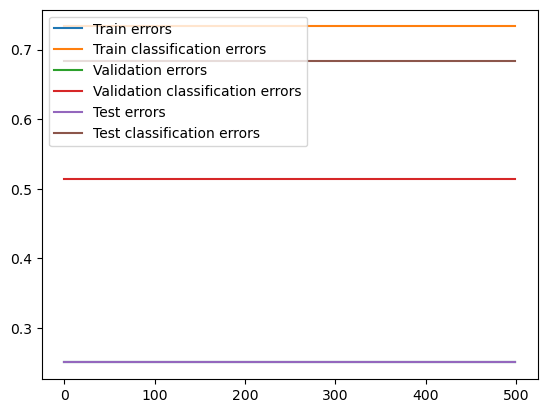

In [62]:
train(iris_train_features.values, iris_train_targets.values, NUMBER_OF_SAMPLES_FOR_BACKPROPAGATION, iris_val_features.values, iris_val_targets.values, iris_test_features.values, iris_test_targets.values)

### Note: __Step 11__ was running the above program

## The backpropagation function (Step 12)

In [63]:
def backpropagation(inputs, weights, learning_rate, biases, number_of_samples_for_backpropagation, target_outputs):
    random_sample_index = np.random.randint(0, inputs.shape[0], size=number_of_samples_for_backpropagation)
    random_sample = inputs[random_sample_index, :]
    # debug prints below
    #print("random_sample.shape:")
    #print(random_sample.shape)
    target_outputs = target_outputs[random_sample_index, :]
    # debug prints below
    #print("target_outputs.shape:")
    #print(target_outputs.shape)
    biases = biases[random_sample_index, :]
    # debug prints below
    #print("biases.shape:")
    #print(biases.shape)
    
    outputs, net = feed_forward(random_sample, weights, biases)
    # debug prints below
    #print("weights.shape:")
    #print(weights.shape)
    #print("outputs.shape:")
    #print(outputs.shape)
    #print("net.shape:")
    #print(net.shape)
    
    error_vector = target_outputs - outputs
    # debug prints below
    #print("error_vector.shape:")
    #print(error_vector.shape)
    
    delta = np.multiply(error_vector, activation_function_derivative(net))
    # debug prints below
    #print("delta.shape:")
    #print(delta.shape)
    
    #weights_delta = learning_rate * np.kron(outputs.T, delta)
    # here I put np.matmul() instead of np.kron() and I multiplied the inputs instead of the outputs
    weights_delta = learning_rate * np.matmul(np.concatenate([random_sample, biases], axis=1).T, delta)
    
    # debug prints below
    #print("outputs.T.shape:")
    #print(outputs.T.shape)
    #print("np.concatenate([random_sample, biases], axis=1).T.shape:")
    #print(np.concatenate([random_sample, biases], axis=1).T.shape)
    #print("np.kron(np.concatenate([random_sample, biases], axis=1).T, delta).shape:")
    #print(np.kron(np.concatenate([random_sample, biases], axis=1).T, delta).shape)
    
    weights = weights + weights_delta
    
    return weights

## Run the program, again (Step 13)

Let me first re-define the _train_ function:

In [64]:
def train(training_set_features, training_set_targets, number_of_samples_for_backpropagation, val_set_features, val_set_targets, test_set_features, test_set_targets):
    number_of_columns_train_features = training_set_features.shape[1]
    number_of_columns_train_targets = training_set_targets.shape[1]
    max_weight = 0.5
    weights = initialize_weights(number_of_columns_train_features + 1, number_of_columns_train_targets, max_weight)
    
    number_of_rows_train = training_set_features.shape[0]
    biases_train = np.ones(shape=(number_of_rows_train, 1))
    number_of_rows_val = val_set_features.shape[0]
    biases_val = np.ones(shape=(number_of_rows_val, 1))
    number_of_rows_test = test_set_features.shape[0]
    biases_test = np.ones(shape=(number_of_rows_test, 1))
    
    # training parameters
    number_of_epochs = 500
    learning_rate = 0.1
    
    train_errors = []
    train_classification_errors = []
    val_errors = []
    val_classification_errors = []
    test_errors = []
    test_classification_errors = []
    
    current_epoch_number = 0
    while (current_epoch_number < number_of_epochs):
        weights = backpropagation(training_set_features, weights, learning_rate, biases_train, number_of_samples_for_backpropagation, training_set_targets)
        if (PLOT_GRAPHS == True):
            train_error, train_classification_error = evaluate_error(training_set_features, weights, training_set_targets, outputs_to_classes(training_set_targets), biases_train)
            val_error, val_classification_error = evaluate_error(val_set_features, weights, val_set_targets, outputs_to_classes(val_set_targets), biases_val)
            test_error, test_classification_error = evaluate_error(test_set_features, weights, test_set_targets, outputs_to_classes(test_set_targets), biases_test)
            
            train_errors.append(train_error)
            train_classification_errors.append(train_classification_error)
            val_errors.append(val_error)
            val_classification_errors.append(val_classification_error)
            test_errors.append(test_error)
            test_classification_errors.append(test_classification_error)
        
        current_epoch_number = current_epoch_number + 1
        
    if (PLOT_GRAPHS == True):
            plt.plot(train_errors, label="Train errors")
            plt.plot(train_classification_errors, label="Train classification errors")
            plt.plot(val_errors, label="Validation errors")
            plt.plot(val_classification_errors, label="Validation classification errors")
            plt.plot(test_errors, label="Test errors")
            plt.plot(test_classification_errors, label="Test classification errors")
            plt.legend(loc="upper left")
    
    train_error, train_classification_error = evaluate_error(training_set_features, weights, training_set_targets, outputs_to_classes(training_set_targets), biases_train)
    val_error, val_classification_error = evaluate_error(val_set_features, weights, val_set_targets, outputs_to_classes(val_set_targets), biases_val)
    test_error, test_classification_error = evaluate_error(test_set_features, weights, test_set_targets, outputs_to_classes(test_set_targets), biases_test)
    
    # debug prints
    print("train_errors:")
    print(train_errors)
    print("train_classification_errors:")
    print(train_classification_errors)
    print("val_errors:")
    print(val_errors)
    print("val_classification_errors:")
    print(val_classification_errors)
    print("test_errors:")
    print(test_errors)
    print("test_classification_errors:")
    print(test_classification_errors)
    
    return (weights, train_error, train_classification_error, val_error, val_classification_error, test_error, test_classification_error)

In [65]:
NUMBER_OF_SAMPLES_FOR_BACKPROPAGATION = 32

train_errors:
[0.22184332284973857, 0.20002771139811834, 0.21372111034267416, 0.18849984970981254, 0.17015261734845255, 0.17345704695764966, 0.16286229540264166, 0.16853277563930755, 0.15317261477942243, 0.15936762973906315, 0.14546537501554863, 0.1476288555558957, 0.13878287292590777, 0.13576995369644174, 0.13999847611430932, 0.13732018677654925, 0.15634375194485095, 0.13175455616802179, 0.1372611125343133, 0.12708335767434611, 0.1341853579028108, 0.12626540786547008, 0.12235840885317674, 0.12602232834512245, 0.11970189838072862, 0.12473788093573415, 0.12617661461724608, 0.1183351987862481, 0.1328114666477242, 0.12602852339779844, 0.11611111615255196, 0.11318252644748994, 0.11614782407471455, 0.12664273089545983, 0.12014411724998175, 0.11602727690670839, 0.11937967198722214, 0.1260174752305892, 0.11705297623489956, 0.11321512122991774, 0.10791710690891944, 0.12323382477811848, 0.10659923525253608, 0.14215925817837943, 0.10614128937758614, 0.11437480524544195, 0.11375394062546698, 0.10

(array([[-1.24819875,  0.97672734, -0.55778144],
        [ 2.3640425 , -3.9727182 , -1.39953966],
        [-3.30431904,  2.23904389,  3.67839408],
        [-3.06272084, -2.41743418,  5.62012386],
        [ 1.4418844 ,  1.59079425, -5.31306353]]),
 0.07451709882488294,
 0.05333333333333334,
 0.0676945477984017,
 0.08108108108108109,
 0.082952581329075,
 0.05263157894736842)

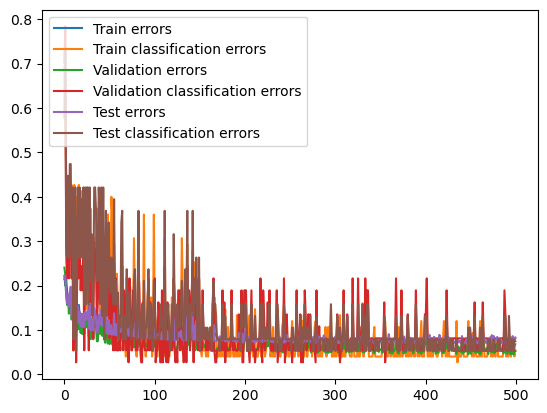

In [66]:
train(iris_train_features.values, iris_train_targets.values, NUMBER_OF_SAMPLES_FOR_BACKPROPAGATION, iris_val_features.values, iris_val_targets.values, iris_test_features.values, iris_test_targets.values)

The training error is going down, which tells me that the training is going good. Also, the training graphs look reasonable (the error is decreasing)

## A proper stopping condition (Step 14)

In [67]:
VAL_ERROR_THRESHOLD = 0.1 # after the validation error drops below this value, the training stops

In [68]:
def train(training_set_features, training_set_targets, number_of_samples_for_backpropagation, val_set_features, val_set_targets, test_set_features, test_set_targets):
    number_of_columns_train_features = training_set_features.shape[1]
    number_of_columns_train_targets = training_set_targets.shape[1]
    max_weight = 0.5
    weights = initialize_weights(number_of_columns_train_features + 1, number_of_columns_train_targets, max_weight)
    
    number_of_rows_train = training_set_features.shape[0]
    biases_train = np.ones(shape=(number_of_rows_train, 1))
    number_of_rows_val = val_set_features.shape[0]
    biases_val = np.ones(shape=(number_of_rows_val, 1))
    number_of_rows_test = test_set_features.shape[0]
    biases_test = np.ones(shape=(number_of_rows_test, 1))
    
    # training parameters
    number_of_epochs = 500
    learning_rate = 0.1
    
    train_errors = []
    train_classification_errors = []
    val_errors = []
    val_classification_errors = []
    test_errors = []
    test_classification_errors = []
    
    current_val_error = 1
    while (current_val_error > VAL_ERROR_THRESHOLD):
        weights = backpropagation(training_set_features, weights, learning_rate, biases_train, number_of_samples_for_backpropagation, training_set_targets)
        if (PLOT_GRAPHS == True):
            train_error, train_classification_error = evaluate_error(training_set_features, weights, training_set_targets, outputs_to_classes(training_set_targets), biases_train)
            val_error, val_classification_error = evaluate_error(val_set_features, weights, val_set_targets, outputs_to_classes(val_set_targets), biases_val)
            current_val_error = val_error
            test_error, test_classification_error = evaluate_error(test_set_features, weights, test_set_targets, outputs_to_classes(test_set_targets), biases_test)
            
            train_errors.append(train_error)
            train_classification_errors.append(train_classification_error)
            val_errors.append(val_error)
            val_classification_errors.append(val_classification_error)
            test_errors.append(test_error)
            test_classification_errors.append(test_classification_error)
        
    if (PLOT_GRAPHS == True):
            plt.plot(train_errors, label="Train errors")
            plt.plot(train_classification_errors, label="Train classification errors")
            plt.plot(val_errors, label="Validation errors")
            plt.plot(val_classification_errors, label="Validation classification errors")
            plt.plot(test_errors, label="Test errors")
            plt.plot(test_classification_errors, label="Test classification errors")
            plt.legend(loc="upper left")
    
    train_error, train_classification_error = evaluate_error(training_set_features, weights, training_set_targets, outputs_to_classes(training_set_targets), biases_train)
    val_error, val_classification_error = evaluate_error(val_set_features, weights, val_set_targets, outputs_to_classes(val_set_targets), biases_val)
    test_error, test_classification_error = evaluate_error(test_set_features, weights, test_set_targets, outputs_to_classes(test_set_targets), biases_test)
    
    # debug prints
    print("train_errors:")
    print(train_errors)
    print("train_classification_errors:")
    print(train_classification_errors)
    print("val_errors:")
    print(val_errors)
    print("val_classification_errors:")
    print(val_classification_errors)
    print("test_errors:")
    print(test_errors)
    print("test_classification_errors:")
    print(test_classification_errors)
    
    return (weights, train_error, train_classification_error, val_error, val_classification_error, test_error, test_classification_error)

In [69]:
NUMBER_OF_SAMPLES_FOR_BACKPROPAGATION = 32

train_errors:
[0.23791039046548962, 0.204209972135962, 0.21507949059518242, 0.191021057661624, 0.18953562334221694, 0.17053416651725803, 0.17389861834591447, 0.18144129049383748, 0.17439754195390636, 0.18586854386065274, 0.15938945745005678, 0.14523167674230697, 0.16632471563873108, 0.14198578641952217, 0.1556399846623598, 0.13719208253247095, 0.1608978791308071, 0.12797448161202316]
train_classification_errors:
[0.6933333333333334, 0.6933333333333334, 0.5733333333333334, 0.4266666666666667, 0.5733333333333334, 0.32, 0.4266666666666667, 0.5733333333333334, 0.4266666666666667, 0.32, 0.30666666666666664, 0.30666666666666664, 0.4266666666666667, 0.21333333333333335, 0.4266666666666667, 0.10666666666666667, 0.32, 0.21333333333333335]
val_errors:
[0.23878697811126845, 0.22538158799374114, 0.26640065903104376, 0.17891741162700744, 0.2115098811718898, 0.17513198046298242, 0.1405652006797044, 0.21007558814886185, 0.12980512826396137, 0.1975269509665186, 0.13638539307609995, 0.14263864733150244

(array([[-0.5111805 ,  0.0057646 ,  0.29579655],
        [ 0.86238392, -0.88363929, -0.36969472],
        [-1.17449937,  0.36790388,  0.68356881],
        [-1.11672083,  0.03940963,  0.94835028],
        [ 0.43853052, -0.03958237, -1.10927296]]),
 0.12797448161202316,
 0.21333333333333335,
 0.09946674873965163,
 0.05405405405405406,
 0.11618606023017233,
 0.18421052631578946)

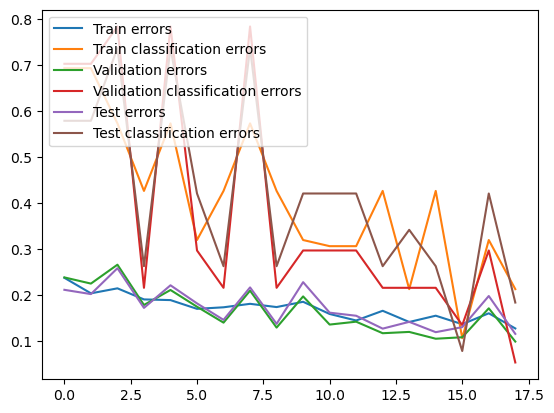

In [70]:
train(iris_train_features.values, iris_train_targets.values, NUMBER_OF_SAMPLES_FOR_BACKPROPAGATION, iris_val_features.values, iris_val_targets.values, iris_test_features.values, iris_test_targets.values)

## Statistical analysis (Step 15)

In [71]:
NUMBER_OF_RUNS = 30

train_errors:
[0.21775715288765443, 0.20611544278119506, 0.19486900332001722, 0.18121578746611697, 0.17876804548455583, 0.2269607581198156, 0.16491302956692103, 0.15537667407680275, 0.16073075952759608, 0.15140307095577132, 0.15116644163130602, 0.15587841844713302, 0.13753454054096376, 0.1360444280073609, 0.1386342982795366]
train_classification_errors:
[0.6666666666666666, 0.6666666666666666, 0.5733333333333334, 0.30666666666666664, 0.4266666666666667, 0.5733333333333334, 0.10666666666666667, 0.04, 0.4266666666666667, 0.38666666666666666, 0.30666666666666664, 0.4266666666666667, 0.06666666666666667, 0.26666666666666666, 0.37333333333333335]
val_errors:
[0.20581631655133406, 0.23420257003636602, 0.21788945028106546, 0.17915547810338175, 0.16173648387032313, 0.2721061313819015, 0.1473399460593367, 0.14370032509369843, 0.13031383366226817, 0.11990708016278188, 0.14191641394513543, 0.11045146047956281, 0.11372947561366596, 0.11934559752593707, 0.09915009253097336]
val_classification_error

train_errors:
[0.2573977392826696, 0.21488419443840803, 0.19918200539876307, 0.19590543130893806, 0.18408249345617408, 0.1710987447506807, 0.17567389365733477, 0.1587770930614057, 0.15253357762633019, 0.151454709007454, 0.1441653296794852, 0.14479060469986504, 0.14545124271349386, 0.13787956690811323, 0.1352067054419987, 0.13479949504116648, 0.13134381222127553, 0.1601431724728361, 0.13023924221529515, 0.12961149566745706, 0.12721204328586205]
train_classification_errors:
[0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.30666666666666664, 0.4266666666666667, 0.32, 0.4266666666666667, 0.30666666666666664, 0.17333333333333334, 0.30666666666666664, 0.09333333333333334, 0.30666666666666664, 0.30666666666666664, 0.21333333333333335, 0.08, 0.28, 0.18666666666666668, 0.4266666666666667, 0.16, 0.09333333333333334, 0.17333333333333334]
val_errors:
[0.3309976926805668, 0.24338951572557033, 0.22806577469465536, 0.19852422516999826, 0.17892421500429584, 0.17622369097313434, 0.1377151

train_errors:
[0.21189251272981563, 0.19588902457060325, 0.1972833872281256, 0.18521217374121685, 0.17822545732259124, 0.16720171857869598, 0.16141369868106753, 0.16240064732767653, 0.1591347986583974, 0.15023734781020417, 0.1996593945164926, 0.14210758592016304, 0.14530852519116025, 0.13699113282881514, 0.15282761071934567, 0.1340992262888167, 0.13619034402873548]
train_classification_errors:
[0.5733333333333334, 0.5733333333333334, 0.37333333333333335, 0.30666666666666664, 0.5733333333333334, 0.29333333333333333, 0.30666666666666664, 0.4266666666666667, 0.4266666666666667, 0.18666666666666668, 0.4266666666666667, 0.2, 0.30666666666666664, 0.30666666666666664, 0.32, 0.36, 0.38666666666666666]
val_errors:
[0.23902238846936136, 0.2128014351822676, 0.22217275949309967, 0.18610775581144273, 0.19492978920333293, 0.16715262670435457, 0.15010826950709863, 0.1357963839309287, 0.1315137316132893, 0.12293668759991873, 0.13712636772328957, 0.11602907166599706, 0.14189652921482396, 0.129838960195

train_errors:
[0.2234034072940969, 0.2265076943064605, 0.19943477148319505, 0.1931613715486154, 0.1798460110956885, 0.18969860052082024, 0.1904177706425367, 0.1599170200401422, 0.18911314471521148, 0.15434812650396568, 0.15096018290370647, 0.1428485740180867, 0.1490211924310022, 0.139686491727113, 0.14192658991369997, 0.13424393278998129, 0.1385351439260679, 0.13638517190540705, 0.1298969698107775, 0.14108074716913732, 0.12654994586426632, 0.12504309834507335, 0.12300568713291446]
train_classification_errors:
[0.6933333333333334, 0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.4, 0.4266666666666667, 0.41333333333333333, 0.30666666666666664, 0.4266666666666667, 0.30666666666666664, 0.30666666666666664, 0.14666666666666667, 0.4266666666666667, 0.29333333333333333, 0.30666666666666664, 0.17333333333333334, 0.38666666666666666, 0.37333333333333335, 0.14666666666666667, 0.30666666666666664, 0.12, 0.10666666666666667, 0.18666666666666668]
val_errors:
[0.26148518276363825, 0.287

train_errors:
[0.20948174336333586, 0.19956541117906965, 0.1913348119632475, 0.20525155944095064, 0.17442193002408019, 0.17064998915508217, 0.16694667099696142, 0.1582194881442528, 0.17591078604946886, 0.14635664890868788, 0.16504305208903755, 0.15175421305431722, 0.1596205057181822, 0.13467329457144284, 0.1572747311481431, 0.13174759175503206, 0.1572875150736337, 0.1372038864579064, 0.13818705626084293, 0.1298376018348693, 0.12404563730999513, 0.13263210254904992, 0.14140498656400027]
train_classification_errors:
[0.5733333333333334, 0.68, 0.5733333333333334, 0.4266666666666667, 0.4, 0.5466666666666666, 0.4266666666666667, 0.14666666666666667, 0.3333333333333333, 0.29333333333333333, 0.32, 0.4266666666666667, 0.30666666666666664, 0.14666666666666667, 0.30666666666666664, 0.10666666666666667, 0.30666666666666664, 0.4, 0.30666666666666664, 0.30666666666666664, 0.12, 0.30666666666666664, 0.4266666666666667]
val_errors:
[0.22580355470308996, 0.19743596765683874, 0.21772468985709162, 0.155

train_errors:
[0.21851094488895315, 0.19971109045842222, 0.2300684667302757, 0.1998988542216713, 0.18305809853796134, 0.17103115500181754, 0.18293824153009827, 0.15966100918982723, 0.1547904305304767, 0.1514650154003809, 0.14918471953269907, 0.1524966807572743, 0.16928175107858523, 0.1470424494115549, 0.15674949438686117, 0.1419000193781321, 0.14529889850297614, 0.14101064217502537, 0.1296345078177437, 0.15398224896495644]
train_classification_errors:
[0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.5733333333333334, 0.4266666666666667, 0.08, 0.4266666666666667, 0.2, 0.24, 0.21333333333333335, 0.16, 0.4266666666666667, 0.3466666666666667, 0.38666666666666666, 0.30666666666666664, 0.21333333333333335, 0.4, 0.30666666666666664, 0.13333333333333333, 0.4266666666666667]
val_errors:
[0.26082806414194404, 0.21906195555456964, 0.28424673747433227, 0.22920045935727645, 0.1846510985087789, 0.16931546175103437, 0.14851870087339264, 0.14448826564378026, 0.151721307051409, 0.12906006

train_errors:
[0.23548557705295636, 0.21740778085648207, 0.18801554669337425, 0.1845000695206526, 0.17394587338145218, 0.162906726558732, 0.15577998036559224, 0.19234283630000087, 0.14884644851841425, 0.1586929462005575, 0.14528120778722073, 0.13878659292713857, 0.1476026732631679, 0.13612567354965685, 0.13294545498341184, 0.1469718482537669, 0.13371225070266407]
train_classification_errors:
[0.6933333333333334, 0.6933333333333334, 0.38666666666666666, 0.5733333333333334, 0.4266666666666667, 0.30666666666666664, 0.30666666666666664, 0.56, 0.04, 0.4266666666666667, 0.21333333333333335, 0.10666666666666667, 0.30666666666666664, 0.28, 0.21333333333333335, 0.30666666666666664, 0.37333333333333335]
val_errors:
[0.23834673081459523, 0.1946112066953573, 0.1700076721959921, 0.21171674456927123, 0.14701110656785887, 0.163041416727807, 0.1513112507934381, 0.22280646102822876, 0.13582157199892542, 0.12088635594068886, 0.11700880935826295, 0.12250101538030478, 0.14467000694281737, 0.10607652700326

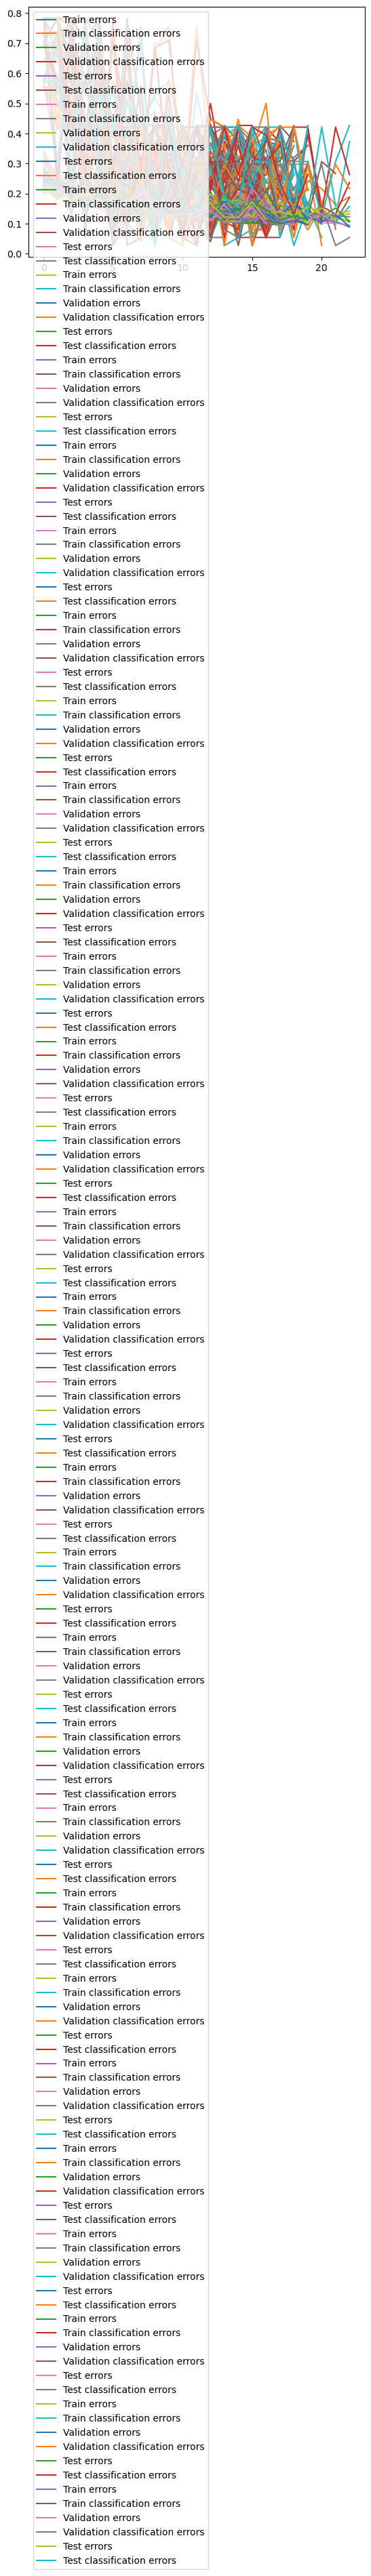

In [72]:
import time

training_times = []
train_regression_errors = []
train_classification_errors = []
val_regression_errors = []
val_classification_errors = []
test_regression_errors = []
test_classification_errors = []

for i in range(0, NUMBER_OF_RUNS):
    start = time.time() # measures time in seconds
    _, train_error, train_classification_error, val_error, val_classification_error, test_error, test_classification_error = train(iris_train_features.values, iris_train_targets.values, NUMBER_OF_SAMPLES_FOR_BACKPROPAGATION, iris_val_features.values, iris_val_targets.values, iris_test_features.values, iris_test_targets.values)
    end = time.time()
    training_times.append(end-start)
    train_regression_errors.append(train_error)
    train_classification_errors.append(train_classification_error)
    val_regression_errors.append(val_error)
    val_classification_errors.append(val_classification_error)
    test_regression_errors.append(test_error)
    test_classification_errors.append(test_classification_error)

Now let's compute the mean, the standard deviation and the maximum for training times:

In [73]:
np.mean(training_times)

0.07426061630249023

In [74]:
np.std(training_times)

0.035105239658910325

In [75]:
np.amax(training_times)

0.1865522861480713

Let's see the same statistic for the test regression errors:

In [76]:
np.mean(test_regression_errors)

0.11267679405496002

In [77]:
np.std(test_regression_errors)

0.002486237230057617

In [78]:
np.amax(test_regression_errors)

0.11771145842511596

Let's see the same statistic for the test classification errors:

In [79]:
np.mean(test_classification_errors)

0.2236842105263158

In [80]:
np.std(test_classification_errors)

0.042839001568683435

In [81]:
np.amax(test_classification_errors)

0.2631578947368421

This concludes this notebook.

## Epilogue

I wrote this notebook in September 2020. I returned to it at the beginning of November 2020. I quickly scrolled over it, re-ran all the notebook cells and everything seemed fine.

I didn't comprehensively check the notebook for logical errors. If there's any, feel free to point it out to me.

# ---------------------------------------------------------------------------------------------------------------

## Deprecated code

## File reading functions (Step 3)

### Note: I wasn't aware that the author of the guide this implementation is based (http://www.code-spot.co.za/2009/10/08/15-steps-to-implemented-a-neural-net/) on made the dataset available, so I downloaded and processed the Iris dataset I found here: https://archive.ics.uci.edu/ml/datasets/iris

In [17]:
DATA_FOLDER_PATH = "data"

In [18]:
iris_dataset = pd.read_csv(DATA_FOLDER_PATH + "/" + "iris.data", names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [19]:
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Let me take just the classes:

In [20]:
iris_dataset_targets = iris_dataset["class"]

In [21]:
iris_dataset_targets

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

And let me take everything except classes:

In [22]:
iris_dataset_features = iris_dataset.drop(columns=["class"])

In [23]:
iris_dataset_features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


For splitting the dataset into train, val and test subsets I will use __sklearn__:

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
VAL_AND_TEST_RATIO = 0.5

In [26]:
iris_dataset_train_features, iris_dataset_val_and_test_features, iris_dataset_train_targets, iris_dataset_val_and_test_targets = train_test_split(iris_dataset_features, iris_dataset_targets, test_size=VAL_AND_TEST_RATIO, stratify=iris_dataset_targets)

In [27]:
len(iris_dataset_train_features)

75

In [28]:
iris_dataset_train_features

,sepal_length,sepal_width,petal_length,petal_width
35,5.0,3.2,1.2,0.2
126,6.2,2.8,4.8,1.8
44,5.1,3.8,1.9,0.4
144,6.7,3.3,5.7,2.5
100,6.3,3.3,6.0,2.5
...,...,...,...,...
149,5.9,3.0,5.1,1.8
9,4.9,3.1,1.5,0.1
102,7.1,3.0,5.9,2.1
28,5.2,3.4,1.4,0.2


In [29]:
len(iris_dataset_val_and_test_features)

75

In [30]:
iris_dataset_val_and_test_features

,sepal_length,sepal_width,petal_length,petal_width
122,7.7,2.8,6.7,2.0
62,6.0,2.2,4.0,1.0
95,5.7,3.0,4.2,1.2
81,5.5,2.4,3.7,1.0
8,4.4,2.9,1.4,0.2
...,...,...,...,...
57,4.9,2.4,3.3,1.0
51,6.4,3.2,4.5,1.5
46,5.1,3.8,1.6,0.2
87,6.3,2.3,4.4,1.3


In [31]:
len(iris_dataset_train_targets)

75

In [32]:
iris_dataset_train_targets

35        Iris-setosa
126    Iris-virginica
44        Iris-setosa
144    Iris-virginica
100    Iris-virginica
            ...      
149    Iris-virginica
9         Iris-setosa
102    Iris-virginica
28        Iris-setosa
119    Iris-virginica
Name: class, Length: 75, dtype: object

In [33]:
len(iris_dataset_val_and_test_targets)

75

In [34]:
iris_dataset_val_and_test_targets

122     Iris-virginica
62     Iris-versicolor
95     Iris-versicolor
81     Iris-versicolor
8          Iris-setosa
            ...       
57     Iris-versicolor
51     Iris-versicolor
46         Iris-setosa
87     Iris-versicolor
36         Iris-setosa
Name: class, Length: 75, dtype: object

Looks good. Now let me further split the _iris_dataset_val_and_test_features_ into _val_ and _test_:

In [35]:
TEST_RATIO = 0.5

In [36]:
iris_dataset_val_features, iris_dataset_test_features, iris_dataset_val_targets, iris_dataset_test_targets = train_test_split(iris_dataset_val_and_test_features, iris_dataset_val_and_test_targets, test_size=TEST_RATIO, stratify=iris_dataset_val_and_test_targets)

In [37]:
len(iris_dataset_val_features)

37

In [38]:
iris_dataset_val_features

,sepal_length,sepal_width,petal_length,petal_width
18,5.7,3.8,1.7,0.3
26,5.0,3.4,1.6,0.4
89,5.5,2.5,4.0,1.3
78,6.0,2.9,4.5,1.5
124,6.7,3.3,5.7,2.1
133,6.3,2.8,5.1,1.5
57,4.9,2.4,3.3,1.0
86,6.7,3.1,4.7,1.5
62,6.0,2.2,4.0,1.0
15,5.7,4.4,1.5,0.4


In [39]:
len(iris_dataset_test_features)

38

In [40]:
iris_dataset_test_features

,sepal_length,sepal_width,petal_length,petal_width
127,6.1,3.0,4.9,1.8
55,5.7,2.8,4.5,1.3
82,5.8,2.7,3.9,1.2
120,6.9,3.2,5.7,2.3
24,4.8,3.4,1.9,0.2
106,4.9,2.5,4.5,1.7
33,5.5,4.2,1.4,0.2
16,5.4,3.9,1.3,0.4
22,4.6,3.6,1.0,0.2
87,6.3,2.3,4.4,1.3


In [41]:
len(iris_dataset_val_targets)

37

In [42]:
iris_dataset_val_targets

18         Iris-setosa
26         Iris-setosa
89     Iris-versicolor
78     Iris-versicolor
124     Iris-virginica
133     Iris-virginica
57     Iris-versicolor
86     Iris-versicolor
62     Iris-versicolor
15         Iris-setosa
95     Iris-versicolor
101     Iris-virginica
65     Iris-versicolor
60     Iris-versicolor
14         Iris-setosa
7          Iris-setosa
3          Iris-setosa
130     Iris-virginica
143     Iris-virginica
125     Iris-virginica
136     Iris-virginica
8          Iris-setosa
12         Iris-setosa
90     Iris-versicolor
108     Iris-virginica
64     Iris-versicolor
38         Iris-setosa
85     Iris-versicolor
123     Iris-virginica
42         Iris-setosa
134     Iris-virginica
79     Iris-versicolor
110     Iris-virginica
46         Iris-setosa
138     Iris-virginica
0          Iris-setosa
25         Iris-setosa
Name: class, dtype: object

In [43]:
len(iris_dataset_test_targets)

38

In [44]:
iris_dataset_test_targets

127     Iris-virginica
55     Iris-versicolor
82     Iris-versicolor
120     Iris-virginica
24         Iris-setosa
106     Iris-virginica
33         Iris-setosa
16         Iris-setosa
22         Iris-setosa
87     Iris-versicolor
92     Iris-versicolor
20         Iris-setosa
97     Iris-versicolor
37         Iris-setosa
21         Iris-setosa
122     Iris-virginica
17         Iris-setosa
13         Iris-setosa
43         Iris-setosa
111     Iris-virginica
131     Iris-virginica
81     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
107     Iris-virginica
54     Iris-versicolor
68     Iris-versicolor
98     Iris-versicolor
114     Iris-virginica
36         Iris-setosa
23         Iris-setosa
75     Iris-versicolor
145     Iris-virginica
91     Iris-versicolor
51     Iris-versicolor
148     Iris-virginica
112     Iris-virginica
142     Iris-virginica
Name: class, dtype: object

## The backpropagation function (Step 12)

This was my attempt at implementing backpropagation from the description on page 291, Chapter 8 of the Deep Learning book (https://www.deeplearningbook.org/contents/optimization.html), but something went wrong.

In [172]:
def backpropagation(inputs, weights, learning_rate, biases, number_of_samples_for_backpropagation, target_outputs):
    print("inputs.shape:")
    print(inputs.shape)
    random_sample_index = np.random.randint(0, inputs.shape[0], size=number_of_samples_for_backpropagation)
    random_sample = inputs[random_sample_index, :]
    print("random_sample.shape:")
    print(random_sample.shape)
    target_outputs = target_outputs[random_sample_index, :]
    print("target_outputs.shape:")
    print(target_outputs.shape)
    biases = biases[random_sample_index, :]
    print("biases.shape:")
    print(biases.shape)
    
    outputs, net = feed_forward(random_sample, weights, biases)
    print("weights.shape:")
    print(weights.shape)
    print("outputs.shape:")
    print(outputs.shape)
    print("net.shape:")
    print(net.shape)
    
    total_error = 0
    for i in range (0, outputs.shape[0]):
        for j in range(0, outputs.shape[1]):
            total_error += (target_outputs[i] - outputs[i])
            
    gradient_estimate = (1 / number_of_samples_for_backpropagation) * total_error
    
    weights = weights - learning_rate * gradient_estimate
    
    return weights